Problem Statement:
    Predicting the price of a diamond based on the feautures like "carat","cut","clarity","color" etc.. attributes
Output: 
    The market price of the diamonds in US dollars by relating the prices of 
De Beers diamonds which were sold to their features.


# importing libraries
Importing dataset contains 11 columns:
    carat:weight of diamond
    cut: how they have shaped ,quality like(fair,good,..)
    color:diamond color from j(Wosrt) to D(Best)
    clarity:y a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best)
    depth:The height of a diamond
    table:The width of the diamond’s table expressed as a percentage of its average diameter
    x : length in mm
    y : width in mm
    z : depth in m                                               

In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
data=pd.read_csv("C:/Users/PRASANNA/Downloads/Diamonds Prices2022.csv/Diamonds Prices2022.csv")
data

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53939,53940,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64
53940,53941,0.71,Premium,E,SI1,60.5,55.0,2756,5.79,5.74,3.49
53941,53942,0.71,Premium,F,SI1,59.8,62.0,2756,5.74,5.73,3.43


In [2]:
#dropping unnecessary column
df=data.drop('Unnamed: 0',axis=1,)
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53939,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64
53940,0.71,Premium,E,SI1,60.5,55.0,2756,5.79,5.74,3.49
53941,0.71,Premium,F,SI1,59.8,62.0,2756,5.74,5.73,3.43


In [3]:
#checking for null values
df.isnull()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
53938,False,False,False,False,False,False,False,False,False,False
53939,False,False,False,False,False,False,False,False,False,False
53940,False,False,False,False,False,False,False,False,False,False
53941,False,False,False,False,False,False,False,False,False,False


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53943 entries, 0 to 53942
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53943 non-null  float64
 1   cut      53943 non-null  object 
 2   color    53943 non-null  object 
 3   clarity  53943 non-null  object 
 4   depth    53943 non-null  float64
 5   table    53943 non-null  float64
 6   price    53943 non-null  int64  
 7   x        53943 non-null  float64
 8   y        53943 non-null  float64
 9   z        53943 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [5]:
df.describe()

,carat,depth,table,price,x,y,z
count,53943.000000,53943.000000,53943.000000,53943.000000,53943.000000,53943.000000,53943.000000
mean,0.797935,61.749322,57.457251,3932.734294,5.731158,5.734526,3.538730
std,0.473999,1.432626,2.234549,3989.338447,1.121730,1.142103,0.705679
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.000000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [6]:
#getting the unique values of data
df.nunique()

carat        273
cut            5
color          7
clarity        8
depth        184
table        127
price      11602
x            554
y            552
z            375
dtype: int64

In [7]:
df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

In [8]:
df.shape

(53943, 10)

In [9]:
df.isna().sum().sum()


0

In [10]:
#removing the rows not having dimensions of dimond
df=df.drop(df[df["x"]==0].index)
df=df.drop(df[df["y"]==0].index)
df=df.drop(df[df["z"]==0].index)

In [11]:
#we can see shape has reduced after deleting dimensionless data
df.shape
#we lost 20 data points ,previous one is"(53943, 10)"

(53923, 10)

A pairs plot is a matrix of scatterplots that lets you understand the pairwise 
 relationship between different variables in a dataset

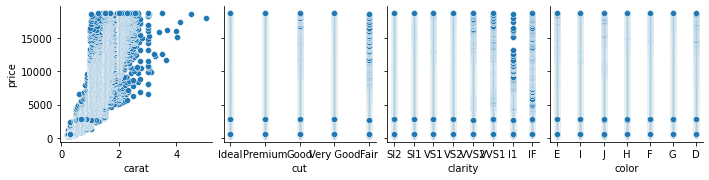

In [12]:
#plot price Vs carat
import matplotlib.pyplot as plt
sn.pairplot(df, x_vars=['carat', 'cut', 'clarity', 'color'], y_vars = ['price'])
plt.show()

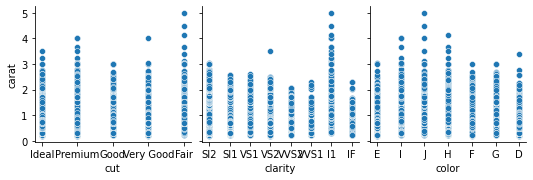

In [13]:
#plot price Vs carat
import matplotlib.pyplot as plt
sn.pairplot(df, x_vars=[ 'cut', 'clarity', 'color'], y_vars = ['carat'])
plt.show()

There are some features with datapoint that are far from the rest of the dataset which will affect the 
outcome of our regression model.
"y" and "z" have some dimensional outlies in our dataset that needs to be eliminated. "depth","table" 
also have some outliers to remove

Text(0.5, 1.0, 'Regression Line on Price vs depth')

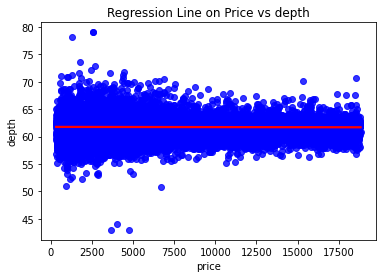

In [14]:
ax=sn.regplot(x="price", y="depth", data=df, fit_reg=True, scatter_kws={"color": "blue"}, line_kws={"color": "red"})
ax.set_title("Regression Line on Price vs depth")


#i can take 75 as first boundary and 45 as my second boundary (outliers)

Text(0.5, 1.0, 'Regression Line on Price vs Table')

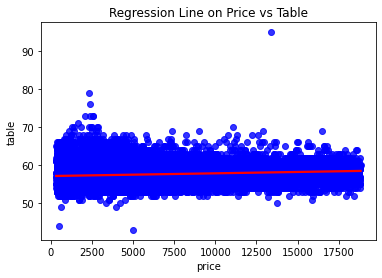

In [15]:
ax=sn.regplot(x="price", y="table", data=df, fit_reg=True, scatter_kws={"color": "blue"}, line_kws={"color": "red"})
ax.set_title("Regression Line on Price vs Table")
#i can take 75,80 as my first boundary line and 50 or 45 as my second boundary line



Text(0.5, 1.0, "Regression Line on Price vs 'y'")

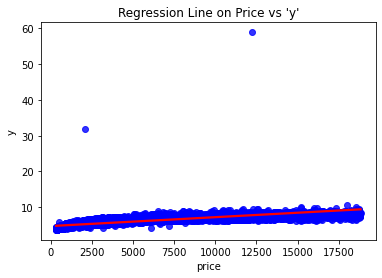

In [16]:
#to remove outliers ,using regresion plots we can look at outliers
ax = sn.regplot(x="price", y="y", data=df, fit_reg=True, scatter_kws={"color": "blue"}, line_kws={"color": "red"})
ax.set_title("Regression Line on Price vs 'y'")

#observing the above plot,we find that after 30 we ingnore the points(outliers)
#we don't take points above 30,therefore 30 is the boundary line

Text(0.5, 1.0, "Regression Line on Price vs 'z'")

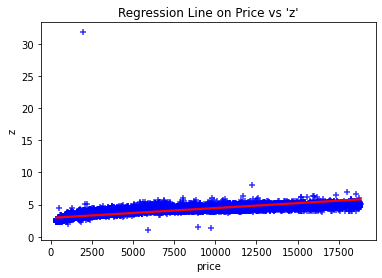

In [17]:
ax= sn.regplot(x="price", y="z", data=df, fit_reg=True, scatter_kws={"color": "blue"}, line_kws={"color": "red"},marker="+")
ax.set_title("Regression Line on Price vs 'z'")


from above graph we can observe that ,we can conider any boundary"12,15,20,.."

In [18]:
#Dropping the outliers. 
df = df[(df["depth"]<75)&(df["depth"]>45)]
df = df[(df["table"]<80)&(df["table"]>40)]
df = df[(df["x"]<30)]
df = df[(df["y"]<30)]
df = df[(df["z"]<30)&(df["z"]>2)]
df.shape

(53910, 10)

In [19]:
df["v"] = df.x * df.y * df.z
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,v
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,38.202030
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,34.505856
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,38.076885
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,46.724580
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,51.917250


In [20]:
#dropping "x","y","z"
df.drop(["x","y","z"], axis=1, inplace=True)
df.head()

,carat,cut,color,clarity,depth,table,price,v
0,0.23,Ideal,E,SI2,61.5,55.0,326,38.202030
1,0.21,Premium,E,SI1,59.8,61.0,326,34.505856
2,0.23,Good,E,VS1,56.9,65.0,327,38.076885
3,0.29,Premium,I,VS2,62.4,58.0,334,46.724580
4,0.31,Good,J,SI2,63.3,58.0,335,51.917250


# Dealing with categorical values

In [21]:
# Getting list of categorical variables
cat =( df.dtypes =="object")
cat

carat      False
cut         True
color       True
clarity     True
depth      False
table      False
price      False
v          False
dtype: bool

In [22]:
col = list(cat[cat].index)
print("Categorical variables:")
print(col)

Categorical variables:
['cut', 'color', 'clarity']


Creating identical variables for the  Categorical variables:['cut', 'color', 'clarity']
    with duplicates.

In [23]:
df.cut.unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [24]:
df.cut.replace({"Ideal":5, "Premium":3, "Good":1,"Very Good":2,"Fair":4}, inplace=True)
df.head()

,carat,cut,color,clarity,depth,table,price,v
0,0.23,5,E,SI2,61.5,55.0,326,38.202030
1,0.21,3,E,SI1,59.8,61.0,326,34.505856
2,0.23,1,E,VS1,56.9,65.0,327,38.076885
3,0.29,3,I,VS2,62.4,58.0,334,46.724580
4,0.31,1,J,SI2,63.3,58.0,335,51.917250


In [25]:
df.color.unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

In [26]:
df.color.replace({"E":2, "I":5, "J":7, "H":6, "F":3, "G":4, "D":1}, inplace=True)
df.head()

,carat,cut,color,clarity,depth,table,price,v
0,0.23,5,2,SI2,61.5,55.0,326,38.202030
1,0.21,3,2,SI1,59.8,61.0,326,34.505856
2,0.23,1,2,VS1,56.9,65.0,327,38.076885
3,0.29,3,5,VS2,62.4,58.0,334,46.724580
4,0.31,1,7,SI2,63.3,58.0,335,51.917250


In [27]:
df.clarity.unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

In [28]:
df.clarity.replace({"SI2":2, "SI1":3, "VS1":5, "VS2":6, "VVS2":8, "VVS1":7, "I1":1,"IF":4}, inplace=True)
df.head()

,carat,cut,color,clarity,depth,table,price,v
0,0.23,5,2,2,61.5,55.0,326,38.202030
1,0.21,3,2,3,59.8,61.0,326,34.505856
2,0.23,1,2,5,56.9,65.0,327,38.076885
3,0.29,3,5,6,62.4,58.0,334,46.724580
4,0.31,1,7,2,63.3,58.0,335,51.917250


# Spliting data

In [29]:
X = df.drop(['price','depth','table','v'], axis=1)
X.head()

,carat,cut,color,clarity
0,0.23,5,2,2
1,0.21,3,2,3
2,0.23,1,2,5
3,0.29,3,5,6
4,0.31,1,7,2


In [30]:
y = df["price"]
y.head()

0    326
1    326
2    327
3    334
4    335
Name: price, dtype: int64

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

# Modle building


Here i'm using 2 Machine Learning models (Linear Regression, Decision Tree Regressor ) to bulid my model
For each model, I checked for Overfitting by comparing the R-squared of each model on the test set to the R-squared of that model on the train test.

For each model, I created a scatter plot of the true prices from the market versus the predicted price from the model.

Train and Build a Linear Regression Model

Liner Regression is one of the most common regression algorithms.

In [32]:
import sklearn.linear_model as sl
linreg = sl.LinearRegression()
linreg.fit(X_train, y_train)
print("R squared of the Linear Regression on training set: {:.2%}".format(linreg.score(X_train, y_train)))
print("R squared of the Linear Regression on test set: {:.2%}".format(linreg.score(X_test, y_test)))
print("\033[1m Accuracy:"+ str(linreg.score(X_test,y_test)*100)+'%')

R squared of the Linear Regression on training set: 89.21%
R squared of the Linear Regression on test set: 89.07%
 Accuracy:89.06969732943128%


<AxesSubplot:xlabel='price'>

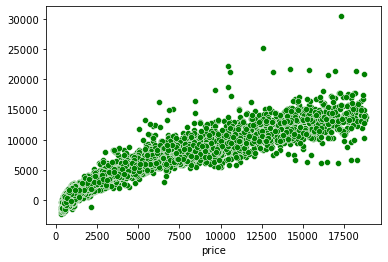

In [33]:
y_pred = linreg.predict(X_test)
sn.scatterplot(x=y_test , y=y_pred, color="green")

Train and Build a Decision Tree Regressor Model

In [34]:
import sklearn.tree as st
tree = st.DecisionTreeRegressor(random_state=42)
tree.fit(X_train, y_train)
print("R squared of the Decision Tree Regressor on training set: {:.2%}".format(tree.score(X_train, y_train)))
print("R squared of the Decision Tree Regressor on test set: {:.2%}".format(tree.score(X_test, y_test)))
print("\033[1mAccuracy:"+ str(tree.score(X_test,y_test)*100)+'%')


R squared of the Decision Tree Regressor on training set: 99.20%
R squared of the Decision Tree Regressor on test set: 97.27%
Accuracy:97.26825858834222%


<AxesSubplot:xlabel='price'>

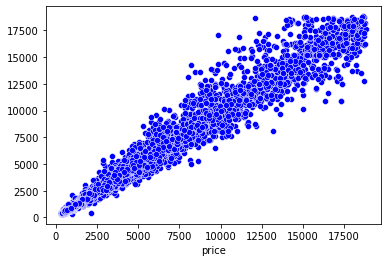

In [35]:
y_pred1 = tree.predict(X_test)
sn.scatterplot(x=y_test , y=y_pred1, color="blue")

# Model Evaluation

Evaluating the Linear Regression Model

In [36]:
d = {"true": y_test, "predicted": y_pred}
lr = pd.DataFrame(data=d)
lr["diff"] = lr["predicted"]-lr["true"]
lr

,true,predicted,diff
6231,4004,5267.012836,1263.012836
12742,5317,6168.989732,851.989732
25686,643,461.526066,-181.473934
31780,773,170.791623,-602.208377
10085,4712,5740.929893,1028.929893
...,...,...,...
4143,3545,4741.256462,1196.256462
18902,7755,8403.511552,648.511552
7296,4201,6335.034241,2134.034241
1980,3093,3413.447587,320.447587


In [37]:
from sklearn.metrics import mean_absolute_error as mae
print("\033[1mMean Absolute Error of the Linear Regression on test set is {:.2f}".format(mae(y_test,y_pred1)))

Mean Absolute Error of the Linear Regression on test set is 326.55


Evaluating the Decision Tree Regressor Model

In [38]:
d = {'true': y_test, 'predicted': y_pred1}
df_dt = pd.DataFrame(data=d)
df_dt["diff"] = df_dt['predicted']-df_dt['true']
df_dt

,true,predicted,diff
6231,4004,4336.466667,332.466667
12742,5317,5225.000000,-92.000000
25686,643,666.000000,23.000000
31780,773,842.666667,69.666667
10085,4712,4624.600000,-87.400000
...,...,...,...
4143,3545,3999.200000,454.200000
18902,7755,8214.500000,459.500000
7296,4201,3435.000000,-766.000000
1980,3093,2962.000000,-131.000000


In [39]:
print("\033[1m Mean Absolute Error of the Decision Tree Regressor on test set is {:.2f}".format(mae(y_test,y_pred1)))

 Mean Absolute Error of the Decision Tree Regressor on test set is 326.55


In [40]:
model=tree
model

DecisionTreeRegressor(random_state=42)

In [66]:
new_diamond = [0.90,5,5,2]
prediction = tree.predict([new_diamond])[0]
print("\033[1m The market price of this new diamond is ${:.2f}".format(prediction))

 The market price of this new diamond is $3017.67


C:\Users\PRASANNA\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


In [42]:
new_diamond = [0.23,5,2,2]
prediction = tree.predict([new_diamond])[0]
print("\033[1m The market price of this new diamond is ${:.2f}".format(prediction))


 The market price of this new diamond is $326.00


C:\Users\PRASANNA\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


In [43]:
new_diamond = [1.0,5,4,8]
prediction = tree.predict([new_diamond])[0]
print("\033[1m The market price of this new diamond is ${:.2f}".format(prediction))

 The market price of this new diamond is $8061.29


C:\Users\PRASANNA\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


In [44]:
new_diamond = [1.00,5,5,5]
prediction = tree.predict([new_diamond])[0]
print("\033[1m The market price of this new diamond is ${:.2f}".format(prediction))

 The market price of this new diamond is $5024.50


C:\Users\PRASANNA\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


In [45]:
new_diamond = [0.23,5,1,7]
prediction = tree.predict([new_diamond])[0]
print("\033[1m The market price of this new diamond is ${:.2f}".format(prediction))

 The market price of this new diamond is $517.50


C:\Users\PRASANNA\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


In [46]:
new_diamond = [0.70,3,1,8]
prediction = tree.predict([new_diamond])[0]
print("\033[1m The market price of this new diamond is ${:.2f}".format(prediction))

 The market price of this new diamond is $3257.67


C:\Users\PRASANNA\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


In [54]:
new_diamond = [0.70,3,1,8]
prediction = tree.predict([new_diamond])[0]

print("\033[1m The market price of this new diamond is ${:.2f}".format(prediction))


 The market price of this new diamond is $3257.67


C:\Users\PRASANNA\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


In [60]:
a=prediction
d=a*81.26
print("indain currency",d)

indain currency 264717.99333333335


In [63]:
a=prediction
b=3257.67*0.27
print("dubai currency",b)

dubai currency 879.5709


In [64]:
a=prediction
c=879.5709*22.12
print("dubai to india currency",c)

dubai to india currency 19456.108308000003


In [65]:
print(264717.99333333335-19456.108308000003)

245261.88502533335
